In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df3 = pd.read_csv("/content/annex3.csv")

In [3]:
df3.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [13]:
df3.tail()

,Date,Item Code,Wholesale Price (RMB/kg)
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45
55981,2023-06-30,106971533450003,1.95


In [14]:
df3.shape

(55982, 3)

In [16]:
df3.columns

Index(['Date', 'Item Code', 'Wholesale Price (RMB/kg)'], dtype='object')

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df3.describe()

,Item Code,Wholesale Price (RMB/kg)
count,5.598200e+04,55982.000000
mean,1.030449e+14,5.962620
std,7.527927e+11,5.067802
min,1.029000e+14,0.010000
25%,1.029000e+14,2.810000
50%,1.029000e+14,4.630000
75%,1.029000e+14,7.570000
max,1.069740e+14,141.000000


In [7]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      55982 non-null  datetime64[ns]
 1   Item Code                 55982 non-null  int64         
 2   Wholesale Price (RMB/kg)  55982 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.3 MB


In [8]:
df3.isna().sum()


,0
Date,0
Item Code,0
Wholesale Price (RMB/kg),0


In [9]:
df3.duplicated().sum()


np.int64(0)

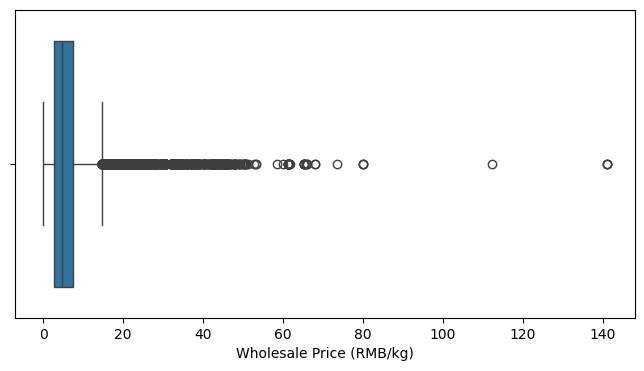

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df3['Wholesale Price (RMB/kg)'])
plt.show()


In [21]:
Q1 = df3['Wholesale Price (RMB/kg)'].quantile(0.25)
Q3 = df3['Wholesale Price (RMB/kg)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df3[
    (df3['Wholesale Price (RMB/kg)'] < Q1 - 1.5 * IQR) |
    (df3['Wholesale Price (RMB/kg)'] > Q3 + 1.5 * IQR)
]


In [23]:
outliers.shape

(2586, 3)

In [24]:
outliers.head()

,Date,Item Code,Wholesale Price (RMB/kg)
33,2020-07-01,102900051000944,29.43
71,2020-07-02,102900051000944,29.54
141,2020-07-04,102900051000944,25.48
434,2020-07-12,102900051000944,24.05
763,2020-07-21,102900051000944,20.00


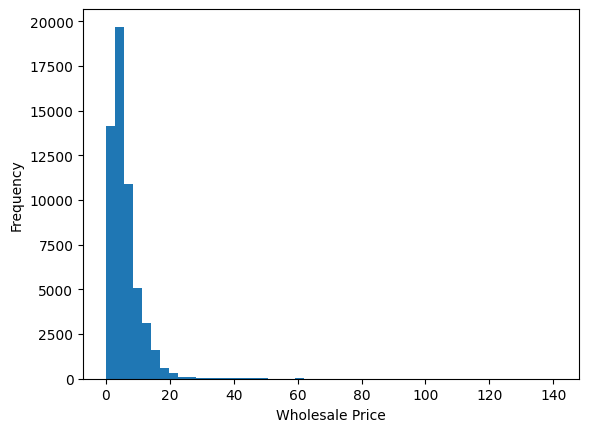

In [25]:
plt.hist(df3['Wholesale Price (RMB/kg)'], bins=50)
plt.xlabel("Wholesale Price")
plt.ylabel("Frequency")
plt.show()


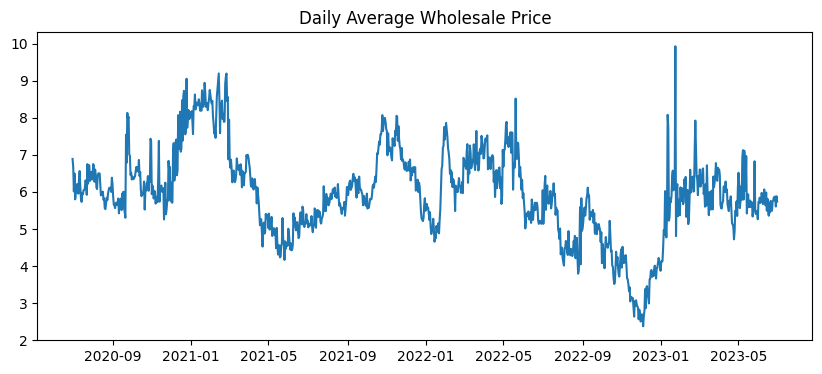

In [26]:
daily_avg = df3.groupby('Date')['Wholesale Price (RMB/kg)'].mean()

plt.figure(figsize=(10,4))
plt.plot(daily_avg)
plt.title("Daily Average Wholesale Price")
plt.show()


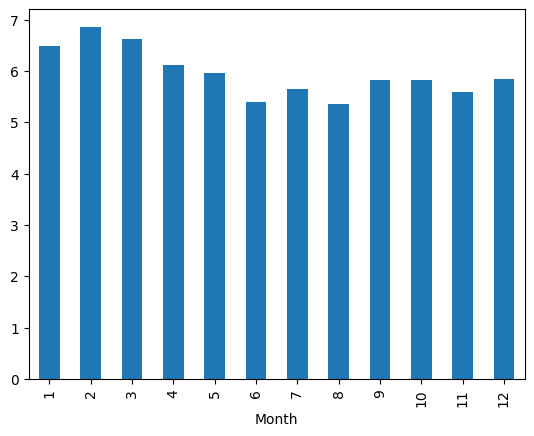

In [27]:
df3['Month'] = df3['Date'].dt.month
monthly_avg = df3.groupby('Month')['Wholesale Price (RMB/kg)'].mean()

monthly_avg.plot(kind='bar')
plt.show()


In [28]:
item_stats = df3.groupby('Item Code')['Wholesale Price (RMB/kg)'].agg(
    ['mean', 'std', 'min', 'max', 'count']
)


In [29]:
item_stats.sort_values('std', ascending=False).head(10)


,mean,std,min,max,count
Item Code,,,,,
102900005128748,55.308333,24.645957,5.00,65.41,6
102900011021675,23.468000,15.698642,12.00,40.67,5
102900011007464,15.340465,13.282258,5.00,50.51,86
102900005125808,17.267199,12.993006,0.26,112.36,714
102900005115199,25.976970,11.208632,2.00,58.60,165
102900011007495,19.000000,9.555175,3.93,35.12,18
102900005116943,13.648338,7.664310,0.05,40.25,728
102900011032480,17.752857,7.327015,12.04,30.78,14
102900011008133,19.260435,7.168167,8.23,34.51,23


In [30]:
item_stats['revenue_proxy'] = item_stats['mean'] * item_stats['count']
item_stats.sort_values('revenue_proxy', ascending=False).head()


,mean,std,min,max,count,revenue_proxy
Item Code,,,,,,
102900005125808,17.267199,12.993006,0.26,112.36,714,12328.78
102900005116530,12.115329,2.087327,0.10,20.00,867,10503.99
102900005116943,13.648338,7.664310,0.05,40.25,728,9935.99
102900005116714,6.826876,1.705701,0.01,14.38,1085,7407.16
102900051004294,8.807213,4.915923,0.01,27.24,818,7204.30


In [ ]:
item_stats['mean'].describe()
